In [19]:
import numpy as np
from math import pi
import gdsfactory as gf


In [20]:
@gf.cell
def generate_device_cell(bridge_thikness=1 , bridge_length=3 , pad_dim_x=250 ,pad_dim_y=250 ,gap=40 , nw_length=2.1, nw_thick=0.1 ):

    #nano wires calculation
    nw_s_l= 0.5 # single nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l


    #cell creation

    #cell = gf.Component(f'NANOWIRE_BRIDGE_nwl_{nw_length:.2f}_nwt_{nw_thick:.2f}')
    #wg1 = gf.component.(length = 10 , npoints=2)
    cell=gf.Component()

    wg1 = gf.component.rectangle(size=(pad_dim_x,pad_dim_y) , layer=(1,0))
    wg2 = gf.component.rectangle(size=(pad_dim_x,pad_dim_y), layer=(1,0)).dmove([0,pad_dim_y+gap])

    cell.add_ref(wg1)
    cell.add_ref(wg2)


    #Bridge creation 
    bridge = gf.Component()
    center_bridge = (pad_dim_x-15 , (pad_dim_y+gap)/2)
    dim_bridge = [bridge_length,bridge_thikness]
    corners_of_bridge = ([(center_bridge[0] - dim_bridge[0] / 2 , center_bridge[1] - dim_bridge[1] / 2),
                          (center_bridge[0] - dim_bridge[0] / 2 , center_bridge[1] + dim_bridge[1] / 2),
                          (center_bridge[0] + dim_bridge[0] / 2 , center_bridge[1] + dim_bridge[1] / 2),
                          (center_bridge[0] + dim_bridge[0] / 2 , center_bridge[1] - dim_bridge[1] / 2)])
    

    bridge.add_polygon(corners_of_bridge )





    corner_up_trape = ([(pad_dim_x-20 , pad_dim_y / 2-5)], corners_bridge[0], corners_bridge[3] , (pad_dim_x-10 , pad_dim_y/2-5))
    corner_lo_trape = ([(pad_dim_x-20 , pad_dim_y / 2-5 + gap +5 )], corners_bridge[1], corners_bridge[2] , (pad_dim_x-10 , pad_dim_y/2+gap+5))


    corner_up_rec = ([(pad_dim_x-20 , pad_dim_y / 2-5),  (pad_dim_x-20 , pad_dim_y/2-35) , (pad_dim_x-10 , pad_dim_y/2-35) ,(pad_dim_x-20 , pad_dim_y / 2-5)])
    corner_lo_rec = ([(pad_dim_x-20 , pad_dim_y / 2+ gap +5),  (pad_dim_x-20 , pad_dim_y/2-35) , (pad_dim_x-10 , pad_dim_y/2 + gap +35) ,(pad_dim_x-20 , pad_dim_y / 2+ gap +5)])





    trape_up = gf.Component()
    trape_up.add_polygon(corner_up_trape)

    trape_lo = gf.Component()
    trape_lo.add_polygon(corner_lo_trape)

    rec_up = gf.Component()
    rec_up.add_polygon(corner_up_rec)

    rec_lo = gf.Component()
    rec_lo.add_polygon(corner_lo_rec)
    

    microbridge = gf.Component()
    microbridge.add_ref([trape_up , trape_lo , rec_lo , rec_up])
    microbridge.dmovex(100)
    cell.add_ref(microbridge)




    



# Generate the device cell
cell = generate_device_cell()
cell.plot()


2024-08-28 09:34:25.511 | ERROR    | kfactory.kcell:wrapper_autocell:3400 - An error has been caught in function 'wrapper_autocell', process 'MainProcess' (29007), thread 'MainThread' (133135510808064):
Traceback (most recent call last):

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/hamed/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
    │   └ <bound method Application.launch_instance of <class 'ipykernel.kernelapp.IPKernelApp'>>
    └ <module 'ipykernel.kernelapp' from '/home/hamed/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py'>
  File "/home/hamed/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
    │   └ <function IPKernelApp.start at 0x791603223560>
    └ <ipykernel.kernelapp.IPKernelApp object at 0x7916063bb510>
  File "/home/hamed/anaconda3/lib/python3.11/

AttributeError: module 'gdsfactory.component' has no attribute 'rectangle'

In [22]:
import gdsfactory as gf

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1
):
    # Create the cell
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    cell = gf.Component('NANOWIRE_BRIDGE nwl={:.2f} nwt={:.2f}'.format(nw_length, nw_thick))

    # Create and add the waveguides (pads)
    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))

    # Move the second waveguide
    wg2.move((0, pad_dim_y + gap))

    # Bridge creation
    center_bridge = (pad_dim_x - 15, (pad_dim_y + gap) / 2)  # Center point of the bridge
    dim_bridge = [bridge_thickness, bridge_length]  # Dimensions of the bridge
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]  # Corners of the bridge between trapezoids

    # Add the bridge to the cell
    cell.add_polygon(corners_bridge, layer=(1, 0))

    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]  # Lower trapezoid

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]  # Upper trapezoid

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]   
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]    

    # Create the microbridge component
    microbridge = gf.Component()
    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    # Create a combined component to show both the main cell and the microbridge
    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    # Add microbridge to the combined component and position it beside the main cell
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 5 * gap, 125))  # Adjust the offset as needed


    



    

    return combined_component

# Generate the device cell
combined_cell = generate_device_cell()
combined_cell.plot()
combined_cell.show()


2024-08-28 09:34:51.816 | ERROR    | kfactory.kcell:wrapper_autocell:3400 - An error has been caught in function 'wrapper_autocell', process 'MainProcess' (29007), thread 'MainThread' (133135510808064):
Traceback (most recent call last):

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/hamed/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
    │   └ <bound method Application.launch_instance of <class 'ipykernel.kernelapp.IPKernelApp'>>
    └ <module 'ipykernel.kernelapp' from '/home/hamed/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py'>
  File "/home/hamed/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
    │   └ <function IPKernelApp.start at 0x791603223560>
    └ <ipykernel.kernelapp.IPKernelApp object at 0x7916063bb510>
  File "/home/hamed/anaconda3/lib/python3.11/

ValueError: Cellname NANOWIRE_BRIDGE nwl=2.10 nwt=0.10 already exists. Please make sure the cellname is unique or pass `allow_duplicate` when creating the library

2024-08-28 09:36:32.701 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 09:36:32.702 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_28_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_28_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 09:36:32.782 | INFO     | kfactory.kcell:show:7900 - klive v0.3.3: Reloaded file '/home/hamed/GDS-Factory/build/gds/217362764.oas'
2024-08-28 09:36:32.783 | WARNING  | kfactory.kcel

/tmp/ipykernel_29007/217362764.py:25: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_29007/217362764.py:75: UserWarning: Getting `Unnamed_28_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_28_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 5 * gap, 125))


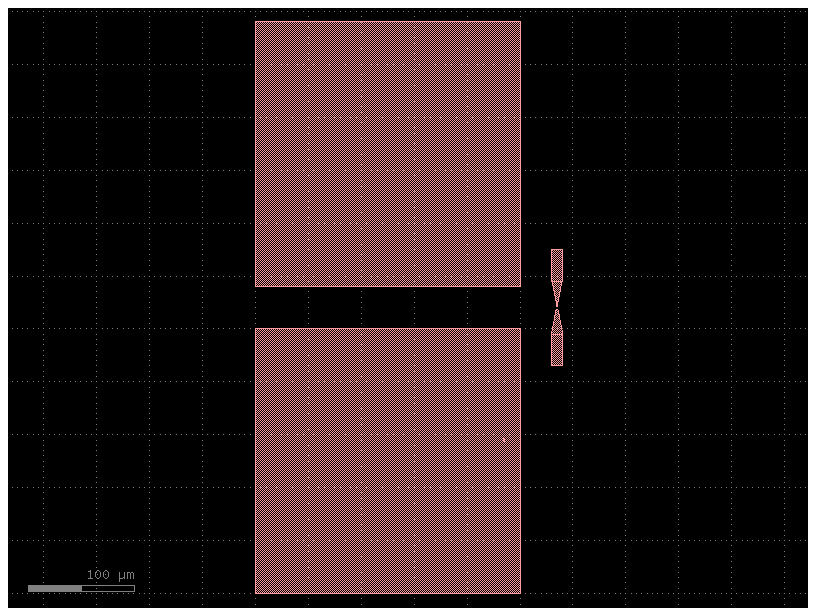

In [28]:
import gdsfactory as gf
import time  # for timestamp-based unique naming

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    center_bridge = (pad_dim_x - 15, (pad_dim_y + gap) / 2)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    cell.add_polygon(corners_bridge, layer=(1, 0))

    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]   
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge = gf.Component()
    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 5 * gap, 125))



    center_nws = (center_bridge[0], center_bridge[1] - nw_count * nw_thick / 2)

    if nw_thick == 0:
        nw_count = -1
        nw_residual = 0
        wire_thickness = 0.001
        wire_corners = [
            (center_nws[0] - 1, center_nws[1] - wire_thickness / 2),
            (center_nws[0] + 1, center_nws[1] - wire_thickness / 2),
            (center_nws[0] + 1, center_nws[1] + wire_thickness / 2),
            (center_nws[0] - 1, center_nws[1] + wire_thickness / 2)
        ]
        wire_polygon = gf.Polygon(wire_corners, layer=(5, 0))
        cell.add_polygon(wire_polygon, layer=(5, 0))





    return combined_component

# Generate the device cell
combined_cell = generate_device_cell()
combined_cell.plot()
combined_cell.show()


2024-08-28 09:40:59.183 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 09:40:59.184 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_34_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_34_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 09:40:59.292 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/home/hamed/GDS-Factory/build/gds/507983865.oas'
2024-08-28 09:40:59.293 | WARNING  | kfactory.kcell:

/tmp/ipykernel_29007/507983865.py:25: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_29007/507983865.py:75: UserWarning: Getting `Unnamed_34_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_34_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 5 * gap, 125))


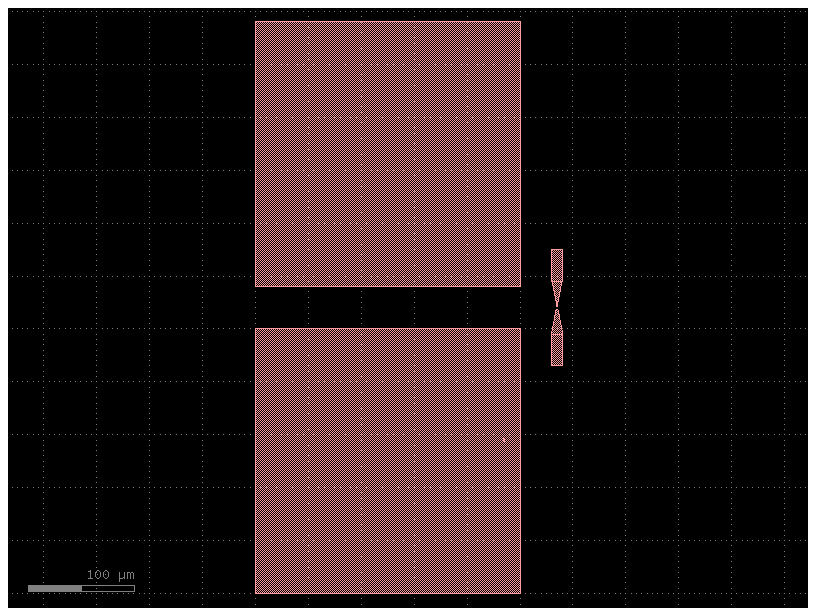

In [30]:
import gdsfactory as gf
import time  # for timestamp-based unique naming

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    center_bridge = (pad_dim_x - 15, (pad_dim_y + gap) / 2)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    cell.add_polygon(corners_bridge, layer=(1, 0))

    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]   
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge = gf.Component()
    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 5 * gap, 125))

    center_nws = (center_bridge[0], center_bridge[1] - nw_count * nw_thick / 2)

    # Draw nanowire segments
    i = 1
    while nw_s_l < i <= nw_count + 1:
        # Create polygon for the wire segment
        wire_thickness = 0.001  # Example thickness for the wire polygon
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        #wire_polygon_left = gf.Polygon(wire_corners_left, layer=(5, 0))
        cell.add_polygon(wire_corners_left, layer=(5, 0))

        i += 1
        if nw_s_l < i <= nw_count + 1:
            wire_corners_right = [
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
            ]
            #wire_polygon_right = gf.Polygon(wire_corners_right, layer=(5, 0))
            cell.add_polygon(wire_corners_right, layer=(5, 0))

            i += 1

    return combined_component

# Generate the device cell
combined_cell = generate_device_cell()
combined_cell.plot()
combined_cell.show()


2024-08-28 10:39:59.938 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 10:39:59.940 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_105_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_105_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 10:40:00.016 | INFO     | kfactory.kcell:show:7900 - klive v0.3.3: Reloaded file '/home/hamed/GDS-Factory/build/gds/1650076483.oas'
2024-08-28 10:40:00.017 | WARNING  | kfactory.k

/tmp/ipykernel_30649/1650076483.py:25: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_30649/1650076483.py:75: UserWarning: Getting `Unnamed_105_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_105_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 5 * gap, 125))


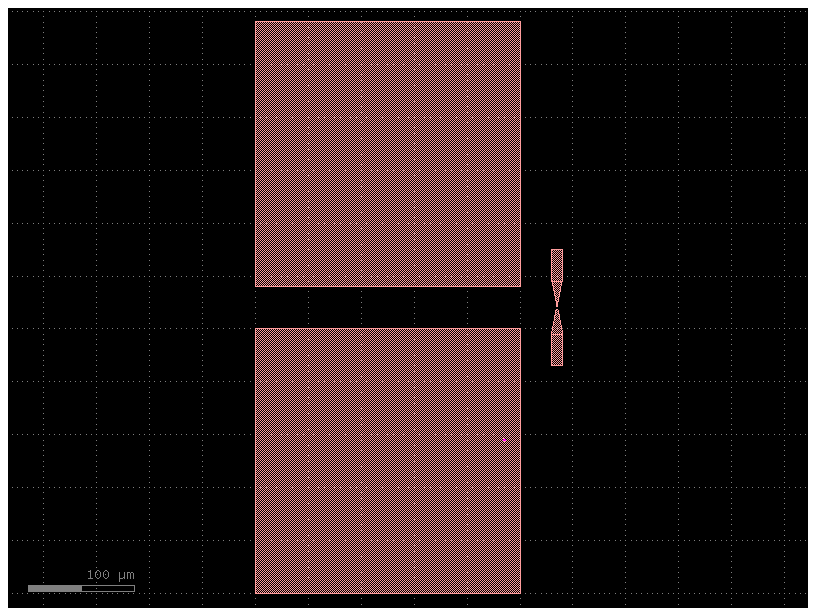

In [36]:
import gdsfactory as gf
import time  # for timestamp-based unique naming

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    center_bridge = (pad_dim_x - 15, (pad_dim_y + gap) / 2)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    cell.add_polygon(corners_bridge, layer=(1, 0))

    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]   
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge = gf.Component()
    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 5 * gap, 125))

    center_nws = (center_bridge[0], center_bridge[1] - nw_count * nw_thick / 2)

    # Draw nanowire segments as polygons
    i = 1
    while nw_s_l < i <= nw_count + 1:
        # Create polygon for the left side wire segment
        wire_thickness = 0.0001  # Example thickness for the wire polygon
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_left, layer=(5, 0))

        i += 1
        if nw_s_l < i <= nw_count + 1:
            # Create polygon for the right side wire segment
            wire_corners_right = [
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
            ]
            cell.add_polygon(wire_corners_right, layer=(5, 0))

            i += 1

        # Handle residual nanowire segment
        if nw_residual > 0.01:
            residual_corners = [
                (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
                (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
            ]
            residual = gf.kdb.DPolygon(residual_corners )
            
            cell.add_polygon(residual, layer=(5, 0) )
    return combined_component



# Generate the device cell
combined_cell = generate_device_cell()
combined_cell.plot()
combined_cell.show()


2024-08-28 10:36:40.049 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 10:36:40.050 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_98_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_98_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 10:36:40.053 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `generate_device_cell_BT_635190f5_145000_270000.move` in um is deprecated and will change to DataBaseUn

/tmp/ipykernel_30649/2421768466.py:26: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_30649/2421768466.py:76: UserWarning: Getting `Unnamed_98_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_98_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 5 * gap, 125))
/tmp/ipykernel_30649/2421768466.py:151: UserWarning: Getting `generate_device_cell_BT_635190f5_145000_270000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `generate_device_cell_BT_635190f5_145000_270000.dmove` instead.
  cell_ref.move((x_pos, y_pos))


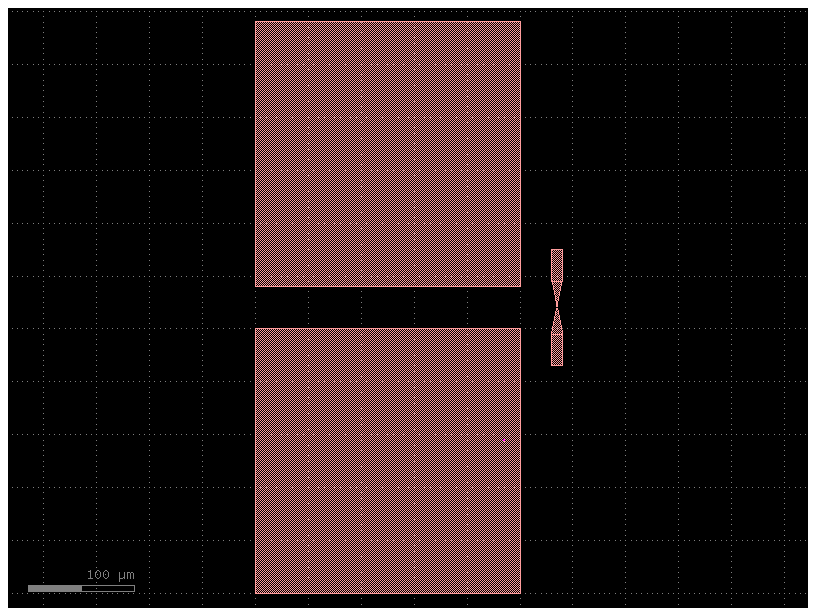

In [34]:
import gdsfactory as gf
import time

# Define the function to generate a cell
@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    center_bridge = (pad_dim_x - 15, (pad_dim_y + gap) / 2)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    cell.add_polygon(corners_bridge, layer=(1, 0))

    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]   
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge = gf.Component()
    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 5 * gap, 125))

    center_nws = (center_bridge[0], center_bridge[1] - nw_count * nw_thick / 2)

    # Draw nanowire segments as polygons
    i = 1
    while nw_s_l < i <= nw_count + 1:
        wire_thickness = 0.001  # Example thickness for the wire polygon
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_left, layer=(5, 0))

        i += 1
        if nw_s_l < i <= nw_count + 1:
            wire_corners_right = [
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
            ]
            cell.add_polygon(wire_corners_right, layer=(5, 0))

            i += 1

    if nw_residual > 0.01:
        residual_corners = [
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
        ]
        cell.add_polygon(residual_corners, layer=(5, 0))

    return combined_component

# Define the chip size
chip_width = 2000
chip_height = 2000

# Create the chip component
@gf.cell
def create_chip():
    chip = gf.Component("CHIP")
    
    # Generate 10 cells with varying parameters
    for i in range(1):
        bridge_thickness = 0.5 + i * 0.1
        bridge_length = 2 + i * 0.5
        pad_dim_x = 250 + i * 10
        pad_dim_y = 250 + i * 10
        gap = 40 + i * 2
        nw_length = 2.0 + i * 0.2
        nw_thick = 0.1 + i * 0.02

        # Generate the cell
        cell = generate_device_cell(
            bridge_thickness=bridge_thickness,
            bridge_length=bridge_length,
            pad_dim_x=pad_dim_x,
            pad_dim_y=pad_dim_y,
            gap=gap,
            nw_length=nw_length,
            nw_thick=nw_thick
        )

        # Add the cell to the chip component
        # Calculate positions to place cells
        x_pos = (i % 5) * (pad_dim_x + gap)
        y_pos = (i // 5) * (pad_dim_y + gap)

        cell_ref = chip.add_ref(cell)
        cell_ref.move((x_pos, y_pos))

    return chip

# Generate the chip with 10 cells
chip = create_chip()

# Plot and show the chip
chip.plot()
chip.show()


2024-08-28 10:36:13.418 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 10:36:13.420 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_93_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_93_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html


/tmp/ipykernel_30649/1498433603.py:25: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_30649/1498433603.py:75: UserWarning: Getting `Unnamed_93_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_93_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 5 * gap, 125))


2024-08-28 10:36:13.676 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/home/hamed/GDS-Factory/build/gds/1498433603.oas'
2024-08-28 10:36:13.677 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.


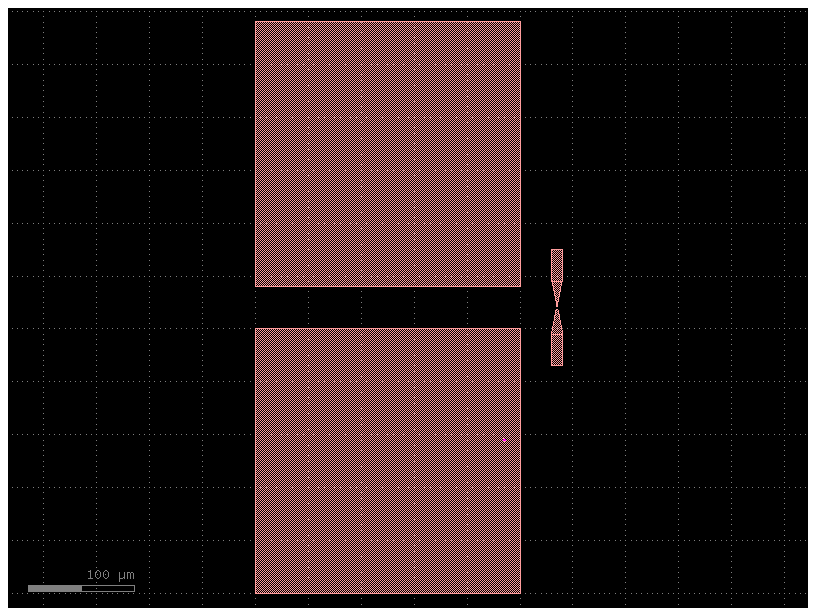

In [33]:
import gdsfactory as gf
import time  # for timestamp-based unique naming

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    center_bridge = (pad_dim_x - 15, (pad_dim_y + gap) / 2)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    cell.add_polygon(corners_bridge, layer=(1, 0))

    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]   
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge = gf.Component()
    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 5 * gap, 125))

    center_nws = (center_bridge[0], center_bridge[1] - nw_count * nw_thick / 2)

    # Create the NanoWire component
    NanoWire = gf.Component()

    for i in range(nw_count):
        # Create polygon for the nanowire segment
        wire_corners = [
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        NanoWire.add_polygon(wire_corners, layer=(5, 0))

    # Handle residual nanowire segment
    if nw_residual > 0.01:
        residual_corners = [
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick),
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
        ]
        NanoWire.add_polygon(residual_corners, layer=(5, 0))

    # Move the NanoWire component to its position
    #NanoWire.move((5, 30))  # Example: Move NanoWire by 5 units in x and 30 units in y direction

    # Combine nanowires with the main component
    combined_component.add_ref(NanoWire)

    return combined_component

# Generate the device cell
combined_cell = generate_device_cell()
combined_cell.plot()
combined_cell.show()


2024-08-28 11:25:24.643 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 11:25:24.644 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_259_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_259_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 11:25:24.745 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/home/hamed/GDS-Factory/build/gds/246174850.oas'
2024-08-28 11:25:24.746 | WARNING  | kfactory.kcel

/tmp/ipykernel_31665/246174850.py:25: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_31665/246174850.py:75: UserWarning: Getting `Unnamed_259_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_259_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))


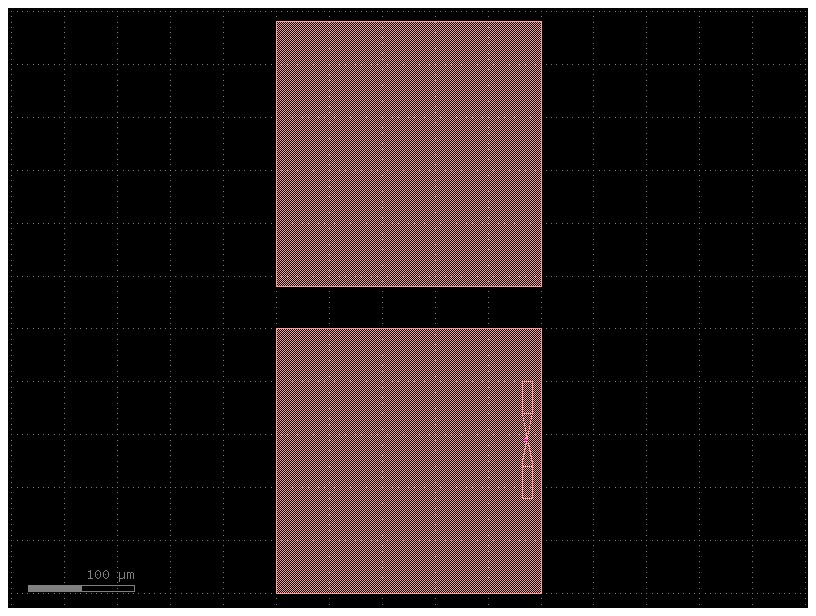

In [69]:
import gdsfactory as gf
import time  # for timestamp-based unique naming

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    center_bridge = (pad_dim_x - 15, (pad_dim_y + gap) / 2)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    cell.add_polygon(corners_bridge, layer=(1, 0))

    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]   
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge = gf.Component()
    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))

    center_nws = (center_bridge[0], center_bridge[1] - nw_count * nw_thick / 2)

    # Draw nanowire segments as polygons
    i = 1
    while nw_s_l < i <= nw_count + 1:
        # Create polygon for the left side wire segment
        wire_thickness = 0.0001  # Example thickness for the wire polygon
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_left, layer=(5, 0))

        i += 1
        if nw_s_l < i <= nw_count + 1:
            # Create polygon for the right side wire segment
            wire_corners_right = [
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
            ]
            cell.add_polygon(wire_corners_right, layer=(5, 0))

            i += 1

        # Handle residual nanowire segment
        if nw_residual > 0.01:
            residual_corners = [
                (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
                (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
            ]
            residual = gf.kdb.DPolygon(residual_corners )
            
            cell.add_polygon(residual, layer=(5, 0) )
    return combined_component



# Generate the device cell
combined_cell = generate_device_cell()
combined_cell.plot()
combined_cell.show()


2024-08-28 18:28:08.687 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 18:28:08.688 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_314_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_314_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 18:28:08.691 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `nanowire_component_NL2p_4aeac26e_0_250.move` in um is deprecated and will change to DataBaseUnits in

/tmp/ipykernel_31665/3056736971.py:76: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_31665/3056736971.py:126: UserWarning: Getting `Unnamed_314_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_314_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))
/tmp/ipykernel_31665/3056736971.py:131: UserWarning: Getting `nanowire_component_NL2p_4aeac26e_0_250.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `nanowire_component_NL2p_4aeac26e_0_250.dmove` instead.
  nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))


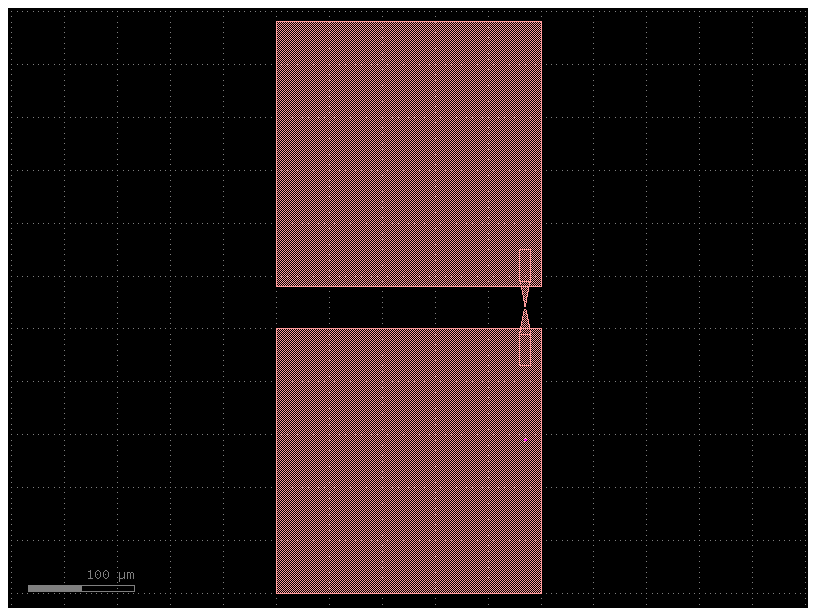

In [83]:
import gdsfactory as gf
import time  # for timestamp-based unique naming

@gf.cell
def nanowire_component(
    nw_length=2.1,
    nw_thick=0.1,
    bridge_thickness=1,
    bridge_length=3
):
    # Create the nanowire component
    cell = gf.Component('NANOWIRE_COMPONENT')

    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    center_nws = (0, 0)

    i = 1
    while nw_s_l < i <= nw_count + 1:
        # Create polygon for the left side wire segment
        wire_thickness = nw_thick
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_left, layer=(5, 0))

        i += 1
        if nw_s_l < i <= nw_count + 1:
            # Create polygon for the right side wire segment
            wire_corners_right = [
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
                (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
            ]
            cell.add_polygon(wire_corners_right, layer=(5, 0))

            i += 1

    # Handle residual nanowire segment
    if nw_residual > 0.01:
        residual_corners = [
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
        ]
        cell.add_polygon(residual_corners, layer=(5, 0))

    return cell

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1,
    nanowire_x_offset=0,  # Parameter for controlling nanowire position
    nanowire_y_offset=0   # Parameter for controlling nanowire position
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    center_bridge = (pad_dim_x - 15, (pad_dim_y + gap) / 2)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    cell.add_polygon(corners_bridge, layer=(1, 0))

    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]   
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge = gf.Component()
    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))

    # Create and add nanowire component
    nw_component = nanowire_component(nw_length=nw_length, nw_thick=nw_thick, bridge_thickness=bridge_thickness, bridge_length=bridge_length)
    nw_ref = combined_component.add_ref(nw_component)
    nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))

    return combined_component

# Generate the device cell with movable nanowire
combined_cell = generate_device_cell(
    nanowire_x_offset=0,  # Adjust nanowire x position here
    nanowire_y_offset=0   # Adjust nanowire y position here
)
combined_cell.plot()
combined_cell.show()


2024-08-28 11:13:54.604 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 11:13:54.605 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_240_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_240_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 11:13:54.607 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `nanowire_cell_NL2p1_NT0_fb109800_0_150.move` in um is deprecated and will change to DataBaseUnits in

/tmp/ipykernel_31665/2532749914.py:75: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_31665/2532749914.py:130: UserWarning: Getting `Unnamed_240_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_240_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))
/tmp/ipykernel_31665/2532749914.py:135: UserWarning: Getting `nanowire_cell_NL2p1_NT0_fb109800_0_150.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `nanowire_cell_NL2p1_NT0_fb109800_0_150.dmove` instead.
  nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))


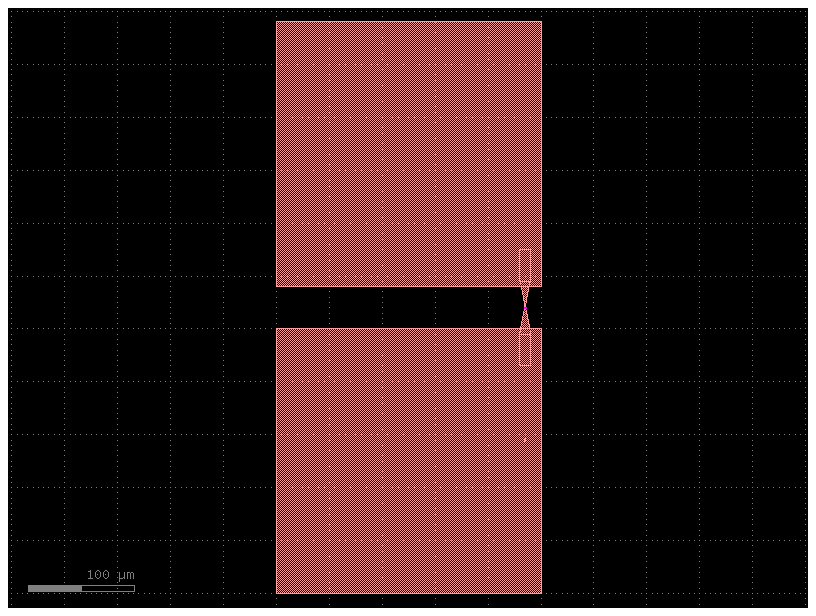

In [63]:
import gdsfactory as gf
import time  # for timestamp-based unique naming

@gf.cell
def nanowire_cell(
    nw_length=2.1,
    nw_thick=0.1,
    bridge_thickness=1,
    bridge_length=3
):
    # Create the nanowire cell
    cell = gf.Component('NANOWIRE_CELL')

    # Define nanowire segments
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    center_nws = (0, 0)
    
    for i in range(nw_count):
        # Create polygon for the nanowire segment
        wire_thickness = nw_thick
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_left, layer=(5, 0))

        # Create polygon for the right side nanowire segment
        wire_corners_right = [
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_right, layer=(5, 0))

    # Handle residual nanowire segment
    if nw_residual > 0.01:
        residual_corners = [
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
        ]
        cell.add_polygon(residual_corners, layer=(5, 0))

    return cell

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1,
    bridge_x_offset=0,  # New parameter for controlling bridge position
    bridge_y_offset=0,  # New parameter for controlling bridge position
    nanowire_x_offset=0,  # New parameter for controlling nanowire position
    nanowire_y_offset=0   # New parameter for controlling nanowire position
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    # Define pads
    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    # Define bridge center and dimensions with offsets
    center_bridge = (pad_dim_x - 15 + bridge_x_offset, (pad_dim_y + gap) / 2 + bridge_y_offset)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    # Create bridge polygon
    cell.add_polygon(corners_bridge, layer=(1, 0))

    # Define microbridge component
    microbridge = gf.Component()
    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))

    # Combine microbridge and main cell
    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))

    # Define and add the nanowire component with offset
    nw_component = nanowire_cell(nw_length=nw_length, nw_thick=nw_thick, bridge_thickness=bridge_thickness, bridge_length=bridge_length)
    nw_ref = combined_component.add_ref(nw_component)
    nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))

    return combined_component

# Generate the device cell
combined_cell = generate_device_cell(
    bridge_x_offset=0,  # Adjust bridge x position here
    bridge_y_offset=0,  # Adjust bridge y position here
    nanowire_x_offset=0,  # Adjust nanowire x position here
    nanowire_y_offset=124.5   # Adjust nanowire y position here
)
combined_cell.plot()
combined_cell.show()




2024-08-28 19:27:28.778 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html


2024-08-28 19:27:28.779 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_64_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_64_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 19:27:28.781 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `nanowire_cell_NL2p1_NT0_fb109800_0_150.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `nanowire_cell_NL2p1_NT0_fb109800_0_150.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 19:27:28.854 | INFO     | kfactory.kcell:show:7900 - klive v0.3.3: Reloaded file '/home/hamed/GDS-Factory/build/gds/694426661.oas'
2024-08-28 19:27:28.855 | WARNING  | kfactory.kcell:show:7940 - KL

/tmp/ipykernel_3772/694426661.py:75: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_3772/694426661.py:134: UserWarning: Getting `Unnamed_64_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_64_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))
/tmp/ipykernel_3772/694426661.py:139: UserWarning: Getting `nanowire_cell_NL2p1_NT0_fb109800_0_150.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `nanowire_cell_NL2p1_NT0_fb109800_0_150.dmove` instead.
  nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))


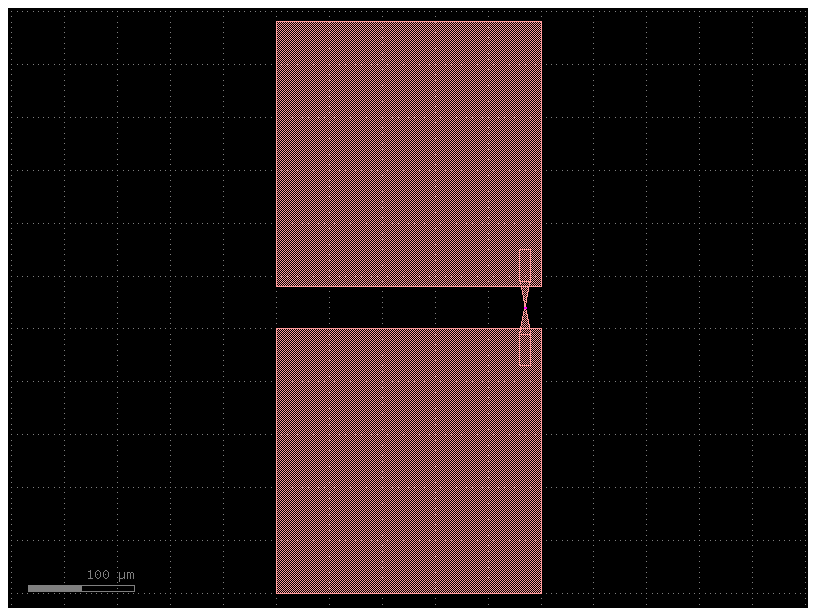

In [24]:
import gdsfactory as gf
import time  # for timestamp-based unique naming

@gf.cell
def nanowire_cell(
    nw_length=2.1,
    nw_thick=0.1,
    bridge_thickness=1,
    bridge_length=3
):
    # Create the nanowire cell
    cell = gf.Component('NANOWIRE_CELL')

    # Define nanowire segments
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    center_nws = (0, 0)
    
    for i in range(nw_count):
        # Create polygon for the nanowire segment
        wire_thickness = nw_thick
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_left, layer=(5, 0))

        # Create polygon for the right side nanowire segment
        wire_corners_right = [
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_right, layer=(5, 0))

    # Handle residual nanowire segment
    if nw_residual > 0.01:
        residual_corners = [
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
        ]
        cell.add_polygon(residual_corners, layer=(5, 0))

    return cell

@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1,
    bridge_x_offset=0,  # New parameter for controlling bridge position
    bridge_y_offset=0,  # New parameter for controlling bridge position
    nanowire_x_offset=0,  # New parameter for controlling nanowire position
    nanowire_y_offset=0   # New parameter for controlling nanowire position
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    # Define pads
    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    # Define bridge center and dimensions with offsets
    center_bridge = (pad_dim_x - 15 + bridge_x_offset, (pad_dim_y + gap) / 2 + bridge_y_offset)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    # Create bridge polygon
    #cell.add_polygon(corners_bridge, layer=(1, 0))


    

    # Define microbridge component
    microbridge = gf.Component()
    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))  
    microbridge.add_polygon(corners_bridge, layer=(1, 0)) 

    # Combine microbridge and main cell
    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))

    # Define and add the nanowire component with offset
    nw_component = nanowire_cell(nw_length=nw_length, nw_thick=nw_thick, bridge_thickness=bridge_thickness, bridge_length=bridge_length)
    nw_ref = combined_component.add_ref(nw_component)
    nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))

    

    
        
    
         

    return combined_component

# Generate the device cell
combined_cell = generate_device_cell(
    bridge_x_offset=0,  # Adjust bridge x position here
    bridge_y_offset=0,  # Adjust bridge y position here
    nanowire_x_offset=0,  # Adjust nanowire x position here
    nanowire_y_offset=124.5   # Adjust nanowire y position here
)


combined_cell.plot()
combined_cell.show()




2024-08-28 19:10:16.965 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/home/hamed/GDS-Factory/build/gds/972254179.oas'
2024-08-28 19:10:16.966 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.


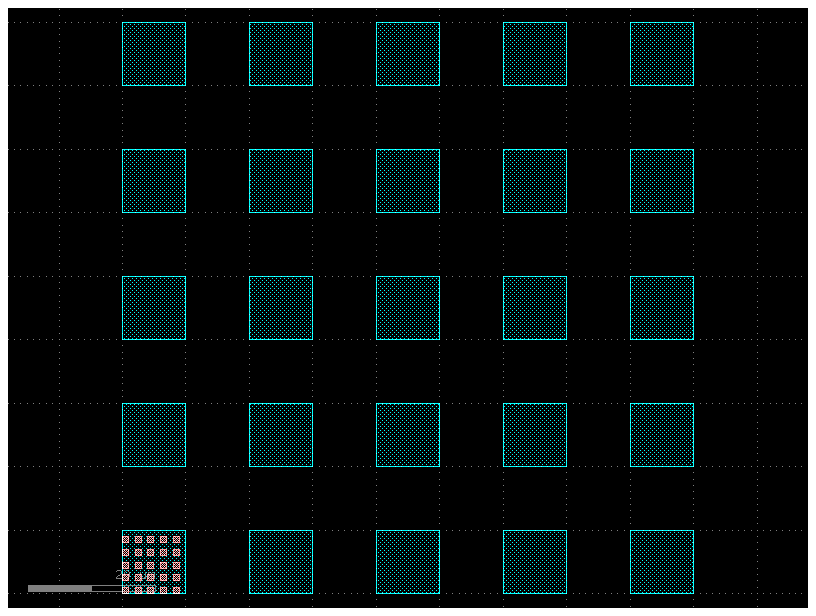

In [10]:
from __future__ import annotations

import gdsfactory as gf
from gdsfactory import cell
from gdsfactory.component import Component
from gdsfactory.typings import ComponentSpec, Float2
from gdsfactory.generic_tech import get_generic_pdk


@cell
def chessboard_component() -> Component:
    """Creates a chessboard pattern as a reusable component."""
    c = Component()
    sq = gf.components.rectangle(size=(1, 1), layer=(1, 0))
    sqb = gf.components.rectangle(size=(10, 10), layer=(2, 0))

    # Create an array of small squares (sq)
    small_square_array = gf.components.array(
        component=sq,
        spacing=(2, 2),  # Adjust spacing between small squares
        columns=5,
        rows=5,
        add_ports=False
    )

    # Create an array of large squares (sqb)
    large_square_array = gf.components.array(
        component=sqb,
        spacing=(20, 20),  # Adjust spacing between large squares
        columns=5,
        rows=5,
        add_ports=False
    )

    # Add the arrays to the component
    small_square_ref = c << small_square_array
    large_square_ref = c << large_square_array

    return c


if __name__ == "__main__":
    PDK = get_generic_pdk()
    PDK.activate()

    c = chessboard_component()
    c.plot()
    c.show()


2024-08-28 19:16:10.724 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 19:16:10.725 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_46_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_46_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 19:16:10.727 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `array_Cnanowire_compone_18365981_0_50150.move` in um is deprecated and will change to DataBaseUnits in

/tmp/ipykernel_3772/840246965.py:80: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_3772/840246965.py:133: UserWarning: Getting `Unnamed_46_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_46_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))
/tmp/ipykernel_3772/840246965.py:146: UserWarning: Getting `array_Cnanowire_compone_18365981_0_50150.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `array_Cnanowire_compone_18365981_0_50150.dmove` instead.
  nanowire_array_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))


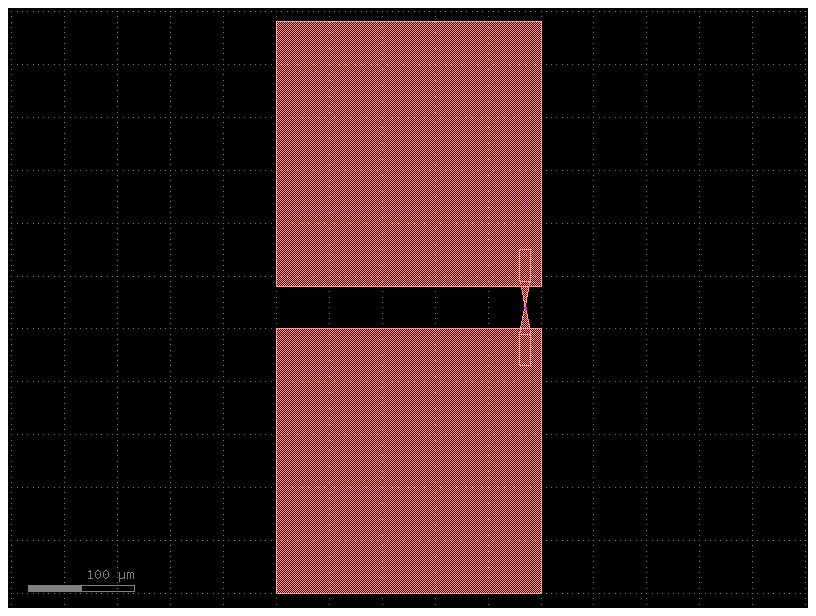

In [18]:
from __future__ import annotations

import gdsfactory as gf
import time  # for timestamp-based unique naming


@gf.cell
def nanowire_component(
    nw_length=2.1,
    nw_thick=0.1,
    bridge_thickness=1,
    bridge_length=3
) -> Component:
    """Creates a nanowire component."""
    c = gf.Component("NANOWIRE_COMPONENT")

    # Define nanowire segments
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l
    center_nws = (0, 0)

    for i in range(nw_count):
        # Create polygon for the left nanowire segment
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        c.add_polygon(wire_corners_left, layer=(5, 0))

        # Create polygon for the right nanowire segment
        wire_corners_right = [
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        c.add_polygon(wire_corners_right, layer=(5, 0))

    # Handle residual nanowire segment
    if nw_residual > 0.01:
        residual_corners = [
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
        ]
        c.add_polygon(residual_corners, layer=(5, 0))

    return c


@gf.cell
def generate_device_array(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1,
    bridge_x_offset=0,
    bridge_y_offset=0,
    nanowire_x_offset=0,
    nanowire_y_offset=0,
    array_rows=3,
    array_columns=1,
    array_spacing=(0, 50),
) -> Component:
    """Generates a device with a nanowire array and pads."""
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define pads
    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    # Define bridge center and dimensions with offsets
    center_bridge = (pad_dim_x - 15 + bridge_x_offset, (pad_dim_y + gap) / 2 + bridge_y_offset)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    # Define microbridge component
    microbridge = gf.Component()
    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))  
    microbridge.add_polygon(corners_bridge, layer=(1, 0)) 

    # Combine microbridge and main cell
    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))

    # Use array function to replicate nanowire components
    nw_component = nanowire_component(nw_length=nw_length, nw_thick=nw_thick, bridge_thickness=bridge_thickness, bridge_length=bridge_length)
    nanowire_array = gf.components.array(
        component=nw_component,
        rows=array_rows,
        columns=array_columns,
        spacing=array_spacing,
        add_ports=False
    )
    
    nanowire_array_ref = combined_component.add_ref(nanowire_array)
    nanowire_array_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))

    return combined_component

# Generate the device cell
combined_cell = generate_device_array(
    bridge_x_offset=0,
    bridge_y_offset=0,
    nanowire_x_offset=0,
    nanowire_y_offset=124.5,
    array_rows=3,  # Specify the number of rows for the nanowire array
    array_columns=1,  # Specify the number of columns for the nanowire array
    array_spacing=(0, 50),  # Specify the spacing for the nanowire array
)

combined_cell.plot()
combined_cell.show()


2024-08-28 19:19:15.659 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 19:19:15.661 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `nanowire_component_NL2p_4aeac26e_0_150.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `nanowire_component_NL2p_4aeac26e_0_150.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-28 19:19:15.817 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/home/hamed/GDS-Factory/build/gds/3000457464.oas'
2024-08-28 19:19:15.817

/tmp/ipykernel_3772/3000457464.py:28: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_3772/3000457464.py:50: UserWarning: Getting `nanowire_component_NL2p_4aeac26e_0_150.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `nanowire_component_NL2p_4aeac26e_0_150.dmove` instead.
  nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))


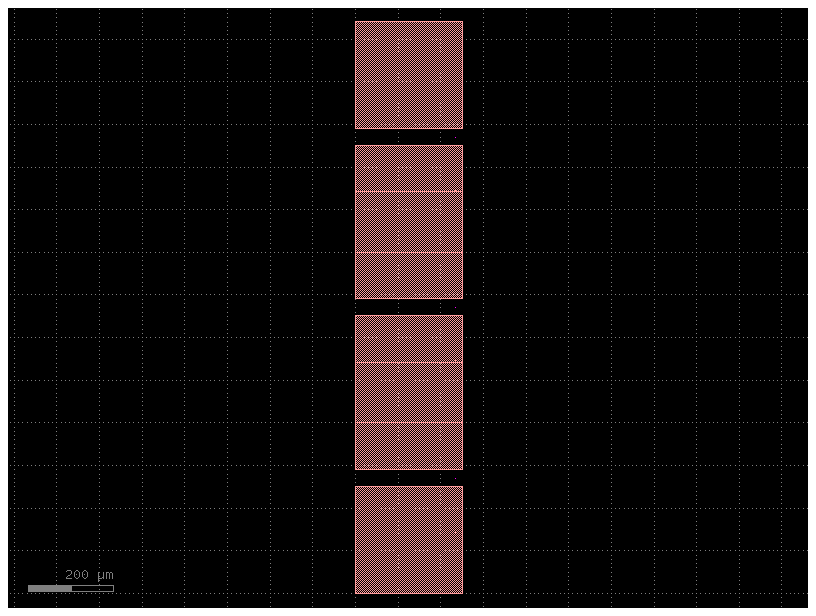

In [19]:
# Updated part of generate_device_cell function
@gf.cell
def generate_device_array(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1,
    bridge_x_offset=0,
    bridge_y_offset=0,
    nanowire_x_offset=0,
    nanowire_y_offset=0,
    array_rows=3,  # Number of rows for the full component array
    array_columns=1,  # Number of columns for the full component array
    array_spacing=(300, 400),  # Spacing for the array, adjust as needed
) -> gf.Component:
    """Generates a device with an array of the full component (nanowire, pads, microbridge)."""

    # Create the full component first
    unique_id = int(time.time())  # Example unique ID based on timestamp
    combined_component = gf.Component(f'FULL_COMPONENT_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define pads and add them to the component
    wg1 = combined_component.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = combined_component.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))

    # Define bridge and microbridge
    center_bridge = (pad_dim_x - 15 + bridge_x_offset, (pad_dim_y + gap) / 2 + bridge_y_offset)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]
    
    # Add microbridge and nanowire
    microbridge = gf.Component()
    # (code for adding polygons to microbridge component remains the same)
    microbridge.add_polygon(corners_bridge, layer=(1, 0))
    combined_component.add_ref(microbridge)
    nw_component = nanowire_component(
        nw_length=nw_length, nw_thick=nw_thick,
        bridge_thickness=bridge_thickness, bridge_length=bridge_length
    )
    nw_ref = combined_component.add_ref(nw_component)
    nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))

    # Now create an array of the full component
    full_component_array = gf.components.array(
        component=combined_component,
        rows=array_rows,
        columns=array_columns,
        spacing=array_spacing,
        add_ports=False
    )

    return full_component_array

# Generate the array of the full component
combined_array_cell = generate_device_array(
    bridge_x_offset=0,
    bridge_y_offset=0,
    nanowire_x_offset=0,
    nanowire_y_offset=124.5,
    array_rows=3,  # Number of rows for the full component array
    array_columns=1,  # Number of columns for the full component array
    array_spacing=(300, 400),  # Spacing between each component in the array
)

combined_array_cell.plot()
combined_array_cell.show()


In [ ]:
import gdsfactory as gf
import time

@gf.cell
def create_nanowire_segment(center, length, thickness, bridge_thickness, offset_x, offset_y):
    """Creates a single nanowire segment."""
    wire_corners_left = [
        (center[0] + length / 2, center[1] - thickness / 2 + thickness * offset_y),
        (center[0] - bridge_thickness / 2 - 0.3, center[1] - thickness / 2 + thickness * offset_y),
        (center[0] - bridge_thickness / 2 - 0.3, center[1] - thickness / 2 + thickness * (offset_y + 1)),
        (center[0] + length / 2, center[1] - thickness / 2 + thickness * (offset_y + 1))
    ]
    wire_corners_right = [
        (center[0] - length / 2, center[1] - thickness / 2 + thickness * offset_y),
        (center[0] + bridge_thickness / 2 + 0.3, center[1] - thickness / 2 + thickness * offset_y),
        (center[0] + bridge_thickness / 2 + 0.3, center[1] - thickness / 2 + thickness * (offset_y + 1)),
        (center[0] - length / 2, center[1] - thickness / 2 + thickness * (offset_y + 1))
    ]
    return wire_corners_left, wire_corners_right

@gf.cell
def nanowire_cell(nw_length=2.1, nw_thick=0.1, bridge_thickness=1, bridge_length=3):
    """Creates the nanowire cell with multiple segments."""
    cell = gf.Component('NANOWIRE_CELL')
    nw_s_l = 0.5
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l
    center_nws = (0, 0)

    for i in range(nw_count):
        left_segment, right_segment = create_nanowire_segment(center_nws, nw_s_l, nw_thick, bridge_thickness, 0, i)
        cell.add_polygon(left_segment, layer=(5, 0))
        cell.add_polygon(right_segment, layer=(5, 0))

    if nw_residual > 0.01:
        residual_segment = [
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
            (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
        ]
        cell.add_polygon(residual_segment, layer=(5, 0))

    return cell

@gf.cell
def create_bridge(center, dim, layer=(1, 0)):
    """Creates a bridge polygon."""
    corners = [
        (center[0] - dim[0] / 2, center[1] - dim[1] / 2),
        (center[0] - dim[0] / 2, center[1] + dim[1] / 2),
        (center[0] + dim[0] / 2, center[1] + dim[1] / 2),
        (center[0] + dim[0] / 2, center[1] - dim[1] / 2)
    ]
    return corners

@gf.cell
def create_microbridge(pad_dim_x, pad_dim_y, gap, corners_bridge, layer=(1, 0)):
    """Creates a microbridge structure."""
    microbridge = gf.Component()
    
    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]
    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]
    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]
    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge.add_polygon(corners_up_trape, layer=layer)
    microbridge.add_polygon(corners_lo_trape, layer=layer)
    microbridge.add_polygon(corners_rec_up, layer=layer)
    microbridge.add_polygon(corners_rec_lo, layer=layer)
    microbridge.add_polygon(corners_bridge, layer=layer)

    return microbridge

@gf.cell
def generate_device_cell(bridge_thickness=1, bridge_length=3, pad_dim_x=250, pad_dim_y=250, gap=40,
                         nw_length=2.1, nw_thick=0.1, bridge_x_offset=0, bridge_y_offset=0, 
                         nanowire_x_offset=0, nanowire_y_offset=0):
    """Generates the entire device cell including pads, bridge, and nanowire."""
    unique_id = int(time.time())
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')
    
    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))
    
    center_bridge = (pad_dim_x - 15 + bridge_x_offset, (pad_dim_y + gap) / 2 + bridge_y_offset)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = create_bridge(center_bridge, dim_bridge)

    microbridge = create_microbridge(pad_dim_x, pad_dim_y, gap, corners_bridge)
    combined_component = gf.Component()
    combined_component.add_ref(cell)
    microbridge_ref = combined_component.add_ref(microbridge)
    microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))

    nw_component = nanowire_cell(nw_length=nw_length, nw_thick=nw_thick, 
                                 bridge_thickness=bridge_thickness, bridge_length=bridge_length)
    nw_ref = combined_component.add_ref(nw_component)
    nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))

    return combined_component

# Generate the device cell
combined_cell = generate_device_cell(
    bridge_x_offset=0,
    bridge_y_offset=0,
    nanowire_x_offset=0,
    nanowire_y_offset=124.5
)

combined_cell.plot()
combined_cell.show()


In [22]:
import gdsfactory as gf
import time

class Nanowire:
    def __init__(self, length=2.1, thickness=0.1, bridge_thickness=1, bridge_length=3):
        self.length = length
        self.thickness = thickness
        self.bridge_thickness = bridge_thickness
        self.bridge_length = bridge_length

    def create_segments(self):
        """Create nanowire segments."""
        nw_s_l = 0.5
        nw_count = int(self.length / nw_s_l)
        nw_residual = self.length % nw_s_l
        center_nws = (0, 0)
        segments = []

        for i in range(nw_count):
            wire_corners_left = [
                (center_nws[0] + nw_s_l / 2, center_nws[1] - self.thickness / 2 + self.thickness * i),
                (center_nws[0] - self.bridge_thickness / 2 - 0.3, center_nws[1] - self.thickness / 2 + self.thickness * i),
                (center_nws[0] - self.bridge_thickness / 2 - 0.3, center_nws[1] - self.thickness / 2 + self.thickness * (i + 1)),
                (center_nws[0] + nw_s_l / 2, center_nws[1] - self.thickness / 2 + self.thickness * (i + 1))
            ]
            wire_corners_right = [
                (center_nws[0] - nw_s_l / 2, center_nws[1] - self.thickness / 2 + self.thickness * i),
                (center_nws[0] + self.bridge_thickness / 2 + 0.3, center_nws[1] - self.thickness / 2 + self.thickness * i),
                (center_nws[0] + self.bridge_thickness / 2 + 0.3, center_nws[1] - self.thickness / 2 + self.thickness * (i + 1)),
                (center_nws[0] - nw_s_l / 2, center_nws[1] - self.thickness / 2 + self.thickness * (i + 1))
            ]
            segments.append((wire_corners_left, wire_corners_right))

        if nw_residual > 0.01:
            residual_segment = [
                (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - self.thickness / 2),
                (center_nws[0] + self.bridge_thickness / 2 + 0.3, center_nws[1] - self.thickness / 2),
                (center_nws[0] + self.bridge_thickness / 2 + 0.3, center_nws[1] - self.thickness / 2 + self.thickness),
                (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - self.thickness / 2 + self.thickness)
            ]
            segments.append((residual_segment,))

        return segments

    def create_cell(self):
        """Create the nanowire cell."""
        cell = gf.Component('NANOWIRE_CELL')
        segments = self.create_segments()
        for segment in segments:
            cell.add_polygon(segment[0], layer=(5, 0))
            if len(segment) > 1:
                cell.add_polygon(segment[1], layer=(5, 0))
        return cell

class Device:
    def __init__(self, pad_dim_x=250, pad_dim_y=250, gap=40, bridge_thickness=1, bridge_length=3):
        self.pad_dim_x = pad_dim_x
        self.pad_dim_y = pad_dim_y
        self.gap = gap
        self.bridge_thickness = bridge_thickness
        self.bridge_length = bridge_length

    def create_bridge(self, center):
        """Create bridge polygon."""
        corners = [
            (center[0] - self.bridge_thickness / 2, center[1] - self.bridge_length / 2),
            (center[0] - self.bridge_thickness / 2, center[1] + self.bridge_length / 2),
            (center[0] + self.bridge_thickness / 2, center[1] + self.bridge_length / 2),
            (center[0] + self.bridge_thickness / 2, center[1] - self.bridge_length / 2)
        ]
        return corners

    def create_microbridge(self, corners_bridge):
        """Create microbridge structure."""
        microbridge = gf.Component()
        corners_up_trape = [
            (self.pad_dim_x - 20, self.pad_dim_y / 2 - 5),
            corners_bridge[0],
            corners_bridge[3],
            (self.pad_dim_x - 10, self.pad_dim_y / 2 - 5)
        ]
        corners_lo_trape = [
            (self.pad_dim_x - 20, self.pad_dim_y / 2 + self.gap + 5),
            corners_bridge[1],
            corners_bridge[2],
            (self.pad_dim_x - 10, self.pad_dim_y / 2 + self.gap + 5)
        ]
        corners_rec_up = [
            (self.pad_dim_x - 20, self.pad_dim_y / 2 - 5),
            (self.pad_dim_x - 20, self.pad_dim_y / 2 - 35),
            (self.pad_dim_x - 10, self.pad_dim_y / 2 - 35),
            (self.pad_dim_x - 10, self.pad_dim_y / 2 - 5)
        ]
        corners_rec_lo = [
            (self.pad_dim_x - 20, self.pad_dim_y / 2 + self.gap + 5),
            (self.pad_dim_x - 20, self.pad_dim_y / 2 + self.gap + 35),
            (self.pad_dim_x - 10, self.pad_dim_y / 2 + self.gap + 35),
            (self.pad_dim_x - 10, self.pad_dim_y / 2 + self.gap + 5)
        ]

        microbridge.add_polygon(corners_up_trape, layer=(1, 0))
        microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
        microbridge.add_polygon(corners_rec_up, layer=(1, 0))
        microbridge.add_polygon(corners_rec_lo, layer=(1, 0))
        microbridge.add_polygon(corners_bridge, layer=(1, 0))
        return microbridge

    def generate_device_cell(self, nanowire, bridge_x_offset=0, bridge_y_offset=0, nanowire_x_offset=0, nanowire_y_offset=0):
        """Generate the device cell with pads, bridge, and nanowire."""
        unique_id = int(time.time())
        cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nanowire.length:.2f}_nwt={nanowire.thickness:.2f}')
        
        wg1 = cell.add_ref(gf.components.rectangle(size=(self.pad_dim_x, self.pad_dim_y), layer=(1, 0)))
        wg2 = cell.add_ref(gf.components.rectangle(size=(self.pad_dim_x, self.pad_dim_y), layer=(1, 0)))
        wg2.move((0, self.pad_dim_y + self.gap))

        center_bridge = (self.pad_dim_x - 15 + bridge_x_offset, (self.pad_dim_y + self.gap) / 2 + bridge_y_offset)
        corners_bridge = self.create_bridge(center_bridge)
        
        microbridge = self.create_microbridge(corners_bridge)
        combined_component = gf.Component()
        combined_component.add_ref(cell)
        microbridge_ref = combined_component.add_ref(microbridge)
        microbridge_ref.move((self.pad_dim_x - 6.25 * self.gap, 125))
        
        nw_cell = nanowire.create_cell()
        nw_ref = combined_component.add_ref(nw_cell)
        nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))
        
        return combined_component

# Instantiate nanowire and device
nanowire = Nanowire(nw_length=2.1, nw_thick=0.1, bridge_thickness=1, bridge_length=3)
device = Device(pad_dim_x=250, pad_dim_y=250, gap=40, bridge_thickness=1, bridge_length=3)

# Generate the device cell
combined_cell = device.generate_device_cell(
    nanowire=nanowire,
    bridge_x_offset=0,
    bridge_y_offset=0,
    nanowire_x_offset=0,
    nanowire_y_offset=124.5
)

combined_cell.plot()
combined_cell.show()


TypeError: Nanowire.__init__() got an unexpected keyword argument 'nw_length'

In [39]:
import gdsfactory as gf

# Initialize the layout cell with a new name
c = gf.Component()

# Define polygons using gf.kdb.DPolygon

# Create and add the main ground polygons
ground_polygons.append(gf.kdb.DPolygon([(-200, 815), (-200, 975), (5450, 975), (5450, 815)]))
ground_polygons.append(kdb.DPolygon([(-200, 100), (-200, 5800), (-40, 5800), (-40, 100)]))

# Create transformed polygons by shifting vertically
ground_polygons.append(gf.kdb.DPolygon([(x, y + 1400) for x, y in ground_polygons[0].points]))
ground_polygons.append(gf.kdb.DPolygon([(x, y + 2800) for x, y in ground_polygons[0].points]))
ground_polygons.append(gf.kdb.DPolygon([(x, y + 4200) for x, y in ground_polygons[0].points]))

# Union of all ground polygons (assuming a method to perform union)
ground_union = gf.kdb.DPolygon(ground_polygons)




NameError: name 'kdb' is not defined

In [1]:
import pathlib
from functools import partial

import pytest
#from pytest_regressions.data_regression import DataRegressionFixture

import gdsfactory as gf
from gdsfactory.difftest import difftest
from gdsfactory.technology import (
    LayerMap,
)
from gdsfactory.typings import Layer

nm = 1e-3


class LayerMapDemo(LayerMap):
    WG: Layer = (1, 0)
    DEVREC: Layer = (68, 0)
    PORT: Layer = (1, 10)
    PORTE: Layer = (1, 11)
    LABEL_INSTANCES: Layer = (206, 0)
    LABEL_SETTINGS: Layer = (202, 0)
    LUMERICAL: Layer = (733, 0)
    M1: Layer = (41, 0)
    M2: Layer = (45, 0)
    M3: Layer = (49, 0)
    N: Layer = (20, 0)
    NP: Layer = (22, 0)
    NPP: Layer = (24, 0)
    OXIDE_ETCH: Layer = (6, 0)
    P: Layer = (21, 0)
    PDPP: Layer = (27, 0)
    PP: Layer = (23, 0)
    PPP: Layer = (25, 0)
    PinRec: Layer = (1, 10)
    PinRecM: Layer = (1, 11)
    SHALLOWETCH: Layer = (2, 6)
    SILICIDE: Layer = (39, 0)
    SIM_REGION: Layer = (100, 0)
    SITILES: Layer = (190, 0)
    SLAB150: Layer = (2, 0)
    SLAB150CLAD: Layer = (2, 9)
    SLAB90: Layer = (3, 0)
    SLAB90CLAD: Layer = (3, 1)
    SOURCE: Layer = (110, 0)
    TE: Layer = (203, 0)
    TEXT: Layer = (66, 0)
    TM: Layer = (204, 0)
    Text: Layer = (66, 0)
    VIA1: Layer = (44, 0)
    VIA2: Layer = (43, 0)
    VIAC: Layer = (40, 0)
    WGCLAD: Layer = (111, 0)
    WGN: Layer = (34, 0)
    WGclad_material: Layer = (36, 0)


LAYER = LayerMapDemo

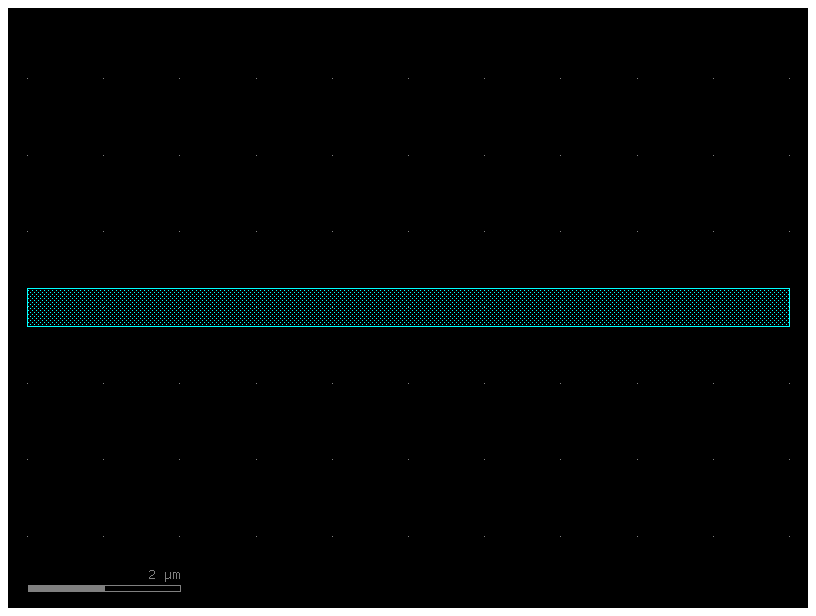

In [4]:
from gdsfactory.cross_section import CrossSection, LayerSpec, cross_section, xsection


@xsection
def strip2(
    width: float = 0.5,
    layer: LayerSpec = (2, 0),
    radius: float = 10.0,
    radius_min: float = 5,
    **kwargs,
) -> CrossSection:
    """Return Strip cross_section."""
    return cross_section(
        width=width,
        layer=layer,
        radius=radius,
        radius_min=radius_min,
        **kwargs,
    )

c = gf.components.straight(cross_section=strip2)
c.plot()

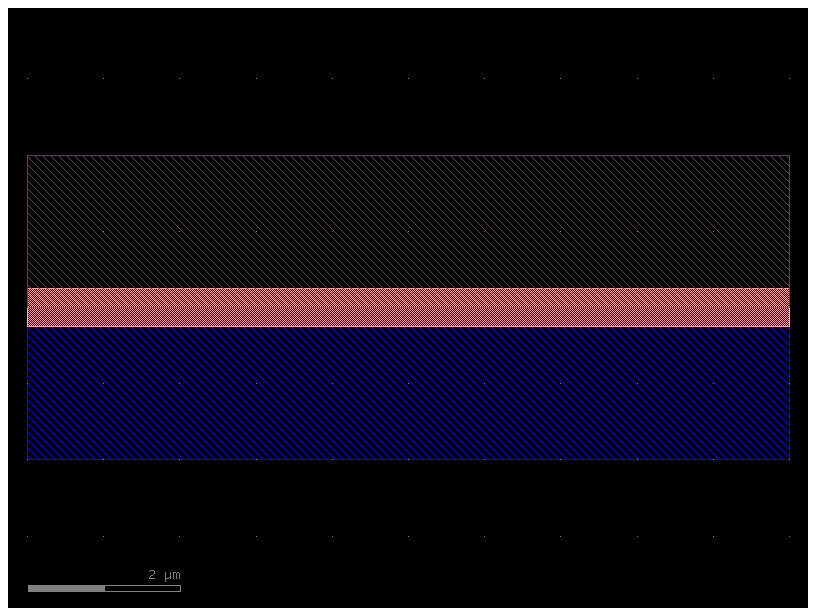

In [5]:
@xsection
def pin(
    width: float = 0.5,
    layer: LayerSpec = "WG",
    radius: float = 10.0,
    radius_min: float = 5,
    layer_p: LayerSpec = (21, 0),
    layer_n: LayerSpec = (20, 0),
    width_p: float = 2,
    width_n: float = 2,
    offset_p: float = 1,
    offset_n: float = -1,
    **kwargs,
) -> CrossSection:
    """Return PIN cross_section."""
    sections = (
        gf.Section(layer=layer_p, width=width_p, offset=offset_p),
        gf.Section(layer=layer_n, width=width_n, offset=offset_n),
    )

    return cross_section(
        width=width,
        layer=layer,
        radius=radius,
        radius_min=radius_min,
        sections=sections,
        **kwargs,
    )


c = gf.components.straight(cross_section=pin)
c.plot()

2024-08-29 00:38:04.515 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-29 00:38:04.516 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `Unnamed_182_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_182_235000_145000.dmove` instead. For further information, please consult the migration guide: https://gdsfactory.github.io/gdsfactory/notebooks/21_migration_guide_7_8.html
2024-08-29 00:38:04.517 | WARNING  | gdsfactory.component:__getattribute__:137 - Getting `nanowire_cell_NL2p1_NT0_fb109800_0_150.move` in um is deprecated and will change to DataBaseUnits in

/tmp/ipykernel_14413/921068710.py:102: UserWarning: Getting `rectangle_S250_250_L1_0_074ab488_125000_125000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `rectangle_S250_250_L1_0_074ab488_125000_125000.dmove` instead.
  wg2.move((0, pad_dim_y + gap))
/tmp/ipykernel_14413/921068710.py:165: UserWarning: Getting `Unnamed_182_235000_145000.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `Unnamed_182_235000_145000.dmove` instead.
  microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))
/tmp/ipykernel_14413/921068710.py:172: UserWarning: Getting `nanowire_cell_NL2p1_NT0_fb109800_0_150.move` in um is deprecated and will change to DataBaseUnits in gdsfactory9. Please use `nanowire_cell_NL2p1_NT0_fb109800_0_150.dmove` instead.
  nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))
/tmp/ipykernel_14413/921068710.py:201: UserWarning: Getting `generate_device_cell_BT_3b46100c_125000_2700

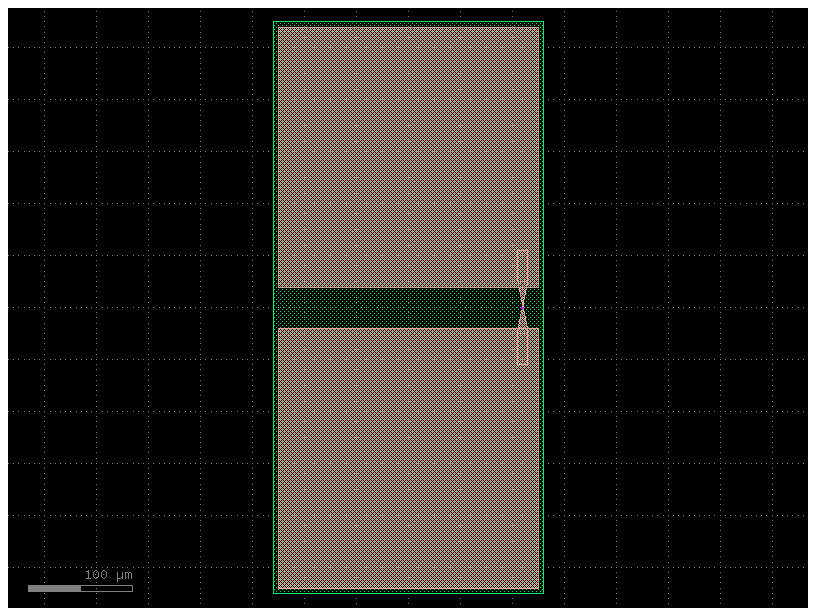

In [38]:
import gdsfactory as gf
import time  # for timestamp-based unique naming
from functools import partial

@gf.cell
def nanowire_cell(
    nw_length=0.1,
    nw_thick=0.0001,
    bridge_thickness=1,
    bridge_length=3
):
    # Create the nanowire cell
    cell = gf.Component('NANOWIRE_CELL')

    # Define nanowire segments
    nw_s_l = 0.5  # Single Nanowire length
    nw_count = int(nw_length / nw_s_l)
    nw_residual = nw_length % nw_s_l

    #NanoWire position
    center_nws = (0, 0)
    
    for i in range(nw_count):
        # Create polygon for the nanowire segment
        wire_thickness = nw_thick
        wire_corners_left = [
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] - bridge_thickness / 2 - 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] + nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_left, layer=(5, 0))

        # Create polygon for the right side nanowire segment
        wire_corners_right = [
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * i),
            (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1)),
            (center_nws[0] - nw_s_l / 2, center_nws[1] - nw_thick / 2 + nw_thick * (i + 1))
        ]
        cell.add_polygon(wire_corners_right, layer=(5, 0))

        # Handle residual nanowire segment
        if nw_residual > 0.01:
            residual_corners = [
                (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2),
                (center_nws[0] + bridge_thickness / 2 + 0.3, center_nws[1] - nw_thick / 2 + nw_thick),
                (center_nws[0] + nw_s_l / 2 - nw_residual, center_nws[1] - nw_thick / 2 + nw_thick)
            ]
            cell.add_polygon(residual_corners, layer=(5, 0))

    return cell






# Example 1: Basic nanowire with default parameters
nanowire1 = nanowire_cell(
    nw_length=11,  # nanowire length
    nw_thick=0.0001,  # nanowire thickness
    bridge_thickness=1,  # thickness of the bridge
    bridge_length=1  # length of the bridge
)



"""# Plot the nanowire cell
nanowire1.plot()
nanowire1.show()"""







@gf.cell
def generate_device_cell(
    bridge_thickness=1,
    bridge_length=3,
    pad_dim_x=250,
    pad_dim_y=250,
    gap=40,
    nw_length=2.1,
    nw_thick=0.1,
    bridge_x_offset=0,  # New parameter for controlling bridge position
    bridge_y_offset=0,  # New parameter for controlling bridge position
    nanowire_x_offset=0,  # New parameter for controlling nanowire position
    nanowire_y_offset=0   # New parameter for controlling nanowire position
):
    # Create the cell with a unique name
    unique_id = int(time.time())  # Example unique ID based on timestamp
    cell = gf.Component(f'NANOWIRE_BRIDGE_{unique_id}_nwl={nw_length:.2f}_nwt={nw_thick:.2f}')

    # Define and create components
    # Define pads
    wg1 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2 = cell.add_ref(gf.components.rectangle(size=(pad_dim_x, pad_dim_y), layer=(1, 0)))
    wg2.move((0, pad_dim_y + gap))



    # Define bridge center and dimensions with offsets
    center_bridge = (pad_dim_x - 15 + bridge_x_offset, (pad_dim_y + gap) / 2 + bridge_y_offset)
    dim_bridge = [bridge_thickness, bridge_length]
    corners_bridge = [
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2),
        (center_bridge[0] - dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] + dim_bridge[1] / 2),
        (center_bridge[0] + dim_bridge[0] / 2, center_bridge[1] - dim_bridge[1] / 2)
    ]

    # Create bridge polygon
    #cell.add_polygon(corners_bridge, layer=(1, 0))

    # Define microbridge component
    microbridge = gf.Component()
    corners_up_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        corners_bridge[0],
        corners_bridge[3],
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_lo_trape = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        corners_bridge[1],
        corners_bridge[2],
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    corners_rec_up = [
        (pad_dim_x - 20, pad_dim_y / 2 - 5),
        (pad_dim_x - 20, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 35),
        (pad_dim_x - 10, pad_dim_y / 2 - 5)
    ]

    corners_rec_lo = [
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 5),
        (pad_dim_x - 20, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 35),
        (pad_dim_x - 10, pad_dim_y / 2 + gap + 5)
    ]

    microbridge.add_polygon(corners_up_trape, layer=(1, 0))
    microbridge.add_polygon(corners_lo_trape, layer=(1, 0))
    microbridge.add_polygon(corners_rec_up, layer=(1, 0))
    microbridge.add_polygon(corners_rec_lo, layer=(1, 0))  
    microbridge.add_polygon(corners_bridge, layer=(1, 0)) 




    # Combine microbridge and main cell
    combined_component = gf.Component()
    main_cell_ref = combined_component.add_ref(cell)
    
    microbridge_ref = combined_component.add_ref(microbridge)


    microbridge_ref.move((pad_dim_x - 6.25 * gap, 125))



    # Define and add the nanowire component with offset to move it
    nw_component = nanowire_cell(nw_length=nw_length, nw_thick=nw_thick, bridge_thickness=bridge_thickness, bridge_length=bridge_length)
    nw_ref = combined_component.add_ref(nw_component)
    nw_ref.move((center_bridge[0] + nanowire_x_offset, center_bridge[1] + nanowire_y_offset))
    

    return combined_component






# Generate the device cell
combined_cell = generate_device_cell(
    bridge_x_offset=0,  # Adjust bridge x position here
    bridge_y_offset=0,  # Adjust bridge y position here
    nanowire_x_offset=0,  # Adjust nanowire x position here
    nanowire_y_offset=124.5   # Adjust nanowire y position here
)



# Create a custom pad component with a specific layer
pad_custom_layer = partial(gf.components.pad, layer=(41, 0))

# Add the combined cell inside this pad layer
pad_cell = gf.Component()
pad_ref = pad_cell.add_ref(pad_custom_layer(size=(260, 550)))  # Adjust size as needed
combined_ref = pad_cell.add_ref(combined_cell)

# Convert pad_ref.center from DPoint to tuple
combined_ref.move((pad_ref.center.x-125, pad_ref.center.y-270))







pad_cell.plot()
pad_cell.show()


2024-08-29 00:23:41.797 | INFO     | kfactory.kcell:show:7894 - klive v0.3.3: Opened file '/home/hamed/GDS-Factory/build/gds/1358898542.oas'
2024-08-29 00:23:41.798 | WARNING  | kfactory.kcell:show:7940 - KLayout GUI version is older than the python klayout.GUI:0.28.16 Python:0.29.6. This might cause missing,unfunctional, or erroneous features. Please update your GUI to a version equal or higher than the python version for optimal performance.


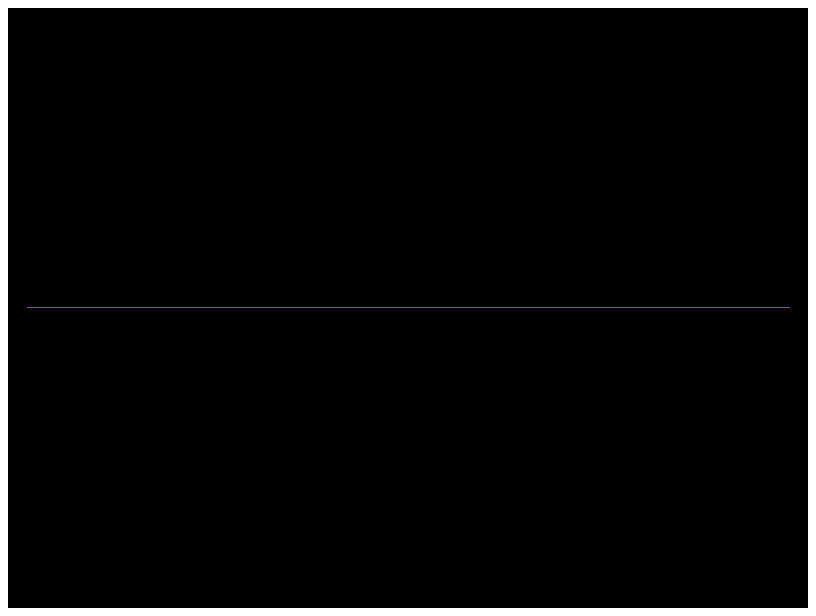

In [10]:
import gdsfactory as gf

# Example 1: Basic nanowire with default parameters
nanowire1 = nanowire_cell(
    nw_length=11,  # nanowire length
    nw_thick=0.0001,  # nanowire thickness
    bridge_thickness=1,  # thickness of the bridge
    bridge_length=1  # length of the bridge
)

# Plot the nanowire cell
nanowire1.plot()
nanowire1.show()
